In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df_le = pd.read_csv('anisotropy_k_neighbors_left_eye.csv', index_col=0)
df_re = pd.read_csv('anisotropy_k_neighbors_right_eye.csv', index_col=0)

In [3]:
df_le.head(10)

,cloud,gf01_k_100,gf02_k_100,gf03_k_100,gf04_k_100,gf05_k_100,gf06_k_100,gf07_k_100,gf08_k_100,gf09_k_100,...,gf01_k_300,gf02_k_300,gf03_k_300,gf04_k_300,gf05_k_300,gf06_k_300,gf07_k_300,gf08_k_300,gf09_k_300,expression
0,bs000_CR_RD_0.pcd,15.757612,1.0,-29.797167,0.886765,0.543769,0.342996,0.063966,0.113235,0.363001,...,44.372532,1.0,-135.127670,0.930348,0.296812,0.633535,0.048500,0.069652,0.224178,RD
1,bs000_PR_SD_0.pcd,11.025925,1.0,-16.543877,0.855051,0.562840,0.292211,0.078235,0.144949,0.090016,...,30.430943,1.0,-77.831032,0.897030,0.598803,0.298227,0.057055,0.102970,0.033172,SD
2,bs000_LFAU_15_0.pcd,11.022415,1.0,-16.081404,0.803804,0.560791,0.243013,0.100449,0.196196,0.072107,...,30.692047,1.0,-78.574463,0.893306,0.740965,0.152341,0.054593,0.106694,0.050208,15
3,bs000_O_GLASSES_0.pcd,11.878249,1.0,-19.639990,0.929886,0.743944,0.185942,0.037212,0.070114,0.170811,...,31.248238,1.0,-80.600998,0.893359,0.796068,0.097291,0.053072,0.106641,0.068491,GLASSES
4,bs000_UFAU_44_0.pcd,9.931419,1.0,-15.149104,0.964590,0.829940,0.134650,0.018630,0.035410,0.056714,...,29.316196,1.0,-75.562958,0.945087,0.808929,0.136158,0.028619,0.054913,0.039941,44
5,bs000_YR_L45_0.pcd,15.581387,1.0,-28.118799,0.716903,0.087307,0.629596,0.171211,0.283097,0.392524,...,37.363922,1.0,-99.451088,0.775601,0.580501,0.195101,0.110579,0.224399,0.229583,L45
6,bs000_LFAU_27_0.pcd,10.943176,1.0,-16.201954,0.841599,0.655464,0.186135,0.080314,0.158401,0.096875,...,30.831970,1.0,-79.762993,0.911593,0.854975,0.056618,0.043512,0.088407,0.079130,27
7,bs000_YR_R10_0.pcd,13.798853,1.0,-24.728403,0.920995,0.777414,0.143581,0.040820,0.079005,0.280312,...,33.516590,1.0,-89.601860,0.915896,0.770283,0.145613,0.043386,0.084104,0.154422,R10
8,bs000_LFAU_22_0.pcd,11.468087,1.0,-18.220570,0.905626,0.717885,0.187742,0.049498,0.094374,0.175305,...,31.674160,1.0,-83.002029,0.918239,0.823890,0.094349,0.041140,0.081761,0.106061,22
9,bs000_YR_L90_0.pcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L90


In [4]:
df_re.head(10)

,cloud,gf01_k_100,gf02_k_100,gf03_k_100,gf04_k_100,gf05_k_100,gf06_k_100,gf07_k_100,gf08_k_100,gf09_k_100,...,gf01_k_300,gf02_k_300,gf03_k_300,gf04_k_300,gf05_k_300,gf06_k_300,gf07_k_300,gf08_k_300,gf09_k_300,expression
0,bs000_CR_RD_0.pcd,10.265024,1.0,-14.820980,0.871235,0.582039,0.289196,0.069997,0.128765,0.016630,...,29.941526,1.0,-77.628586,0.929219,0.511919,0.417300,0.042807,0.070781,0.005989,RD
1,bs000_PR_SD_0.pcd,13.305099,1.0,-22.890179,0.868289,0.379340,0.488949,0.080177,0.131711,0.244643,...,32.188347,1.0,-83.732140,0.883188,0.542593,0.340595,0.065765,0.116812,0.088972,SD
2,bs000_LFAU_15_0.pcd,12.957056,1.0,-22.217060,0.907021,0.620544,0.286477,0.051469,0.092979,0.242904,...,35.020573,1.0,-93.917191,0.882680,0.756314,0.126366,0.058926,0.117320,0.198090,15
3,bs000_O_GLASSES_0.pcd,12.471084,1.0,-20.742802,0.889023,0.501766,0.387257,0.064382,0.110977,0.144740,...,32.922890,1.0,-86.741165,0.894512,0.848124,0.046387,0.051230,0.105488,0.130115,GLASSES
4,bs000_UFAU_44_0.pcd,10.404537,1.0,-15.242708,0.875631,0.843794,0.031837,0.059435,0.124369,0.082522,...,29.105839,1.0,-74.620255,0.940221,0.750898,0.189323,0.031960,0.059779,0.036904,44
5,bs000_YR_L45_0.pcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L45
6,bs000_LFAU_27_0.pcd,10.525225,1.0,-16.266172,0.939323,0.842118,0.097206,0.030903,0.060677,0.113306,...,31.103268,1.0,-81.355835,0.929666,0.783005,0.146661,0.036562,0.070334,0.096041,27
7,bs000_YR_R10_0.pcd,13.152914,1.0,-23.063438,0.902935,0.385736,0.517199,0.061439,0.097065,0.182471,...,31.160370,1.0,-78.013077,0.805135,0.733271,0.071865,0.091787,0.194865,0.044623,R10
8,bs000_LFAU_22_0.pcd,12.639986,1.0,-20.031702,0.774932,0.359900,0.415032,0.124345,0.225068,0.170267,...,31.019093,1.0,-79.019737,0.869009,0.742818,0.126190,0.065339,0.130991,0.055326,22
9,bs000_YR_L90_0.pcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L90


- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: Somatório i=1 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [5]:
features = [
    'Somatório', 'Omnivariância', 'Autoentropia',
    'Anisotropia', 'Planaridade', 'Linearidade',
    'Variação de superfície', 'Esfericidade', 'Verticalidade'
]

In [6]:
columns = df_le.columns[1:-1]

In [7]:
def plot_histograms(df, k=100, expression=None, position=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_k_{k}', f'gf02_k_{k}', f'gf03_k_{k}',
            f'gf04_k_{k}', f'gf05_k_{k}', f'gf06_k_{k}',
            f'gf07_k_{k}', f'gf08_k_{k}', f'gf09_k_{k}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    df = df[columns]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
    title = f'Histogramas - Olho {position} - K Vizinhos: {k} {expression}'
    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    plt.show()

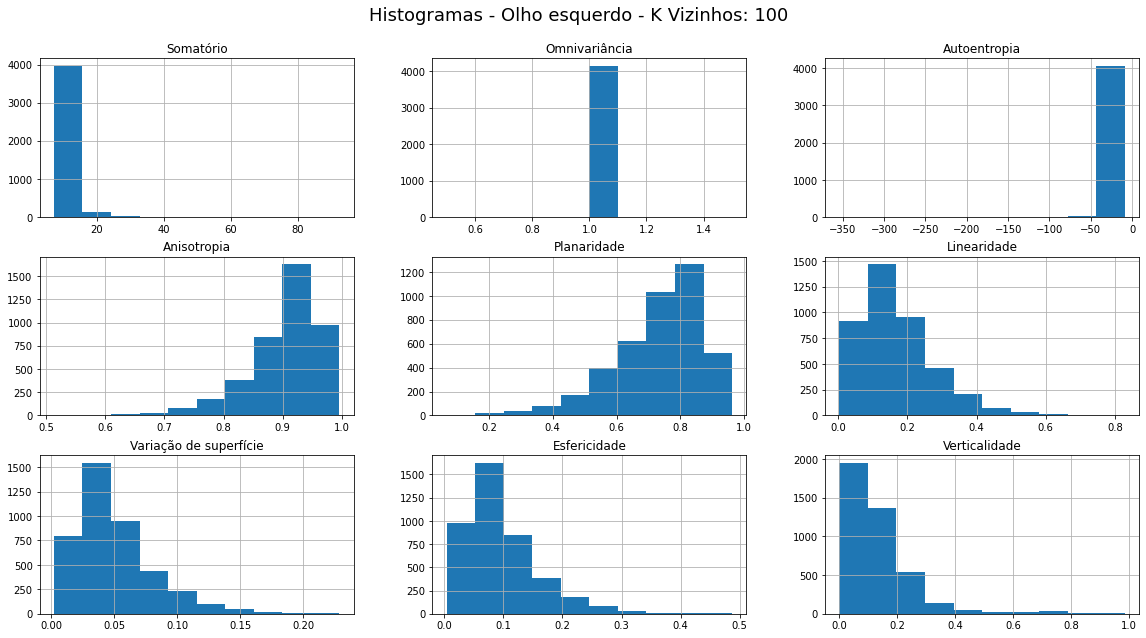

In [8]:
plot_histograms(df_le, position='esquerdo')

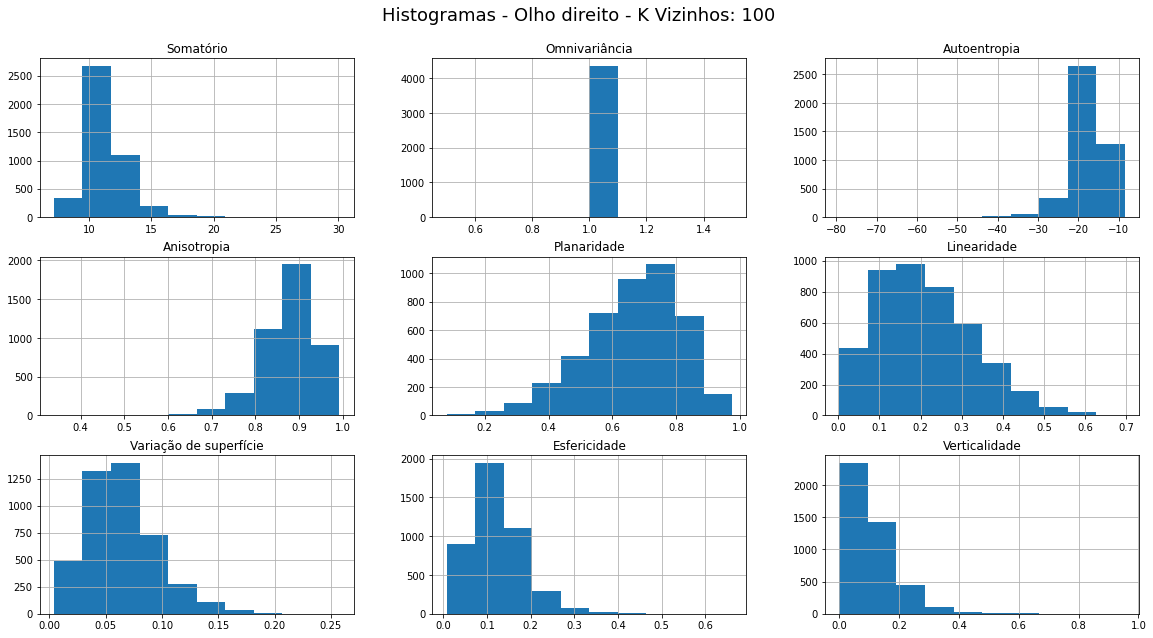

In [9]:
plot_histograms(df_re, position='direito')

In [10]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
labels = ['100k', '150k', '200k', '250k', '300k']

In [11]:
# gfIndex: valor entre 0-8
# 0 significa Somatório
# 8 significa Verticalidade
def plot_histogram_together(df, gfIndex=0):
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    arr = []
    for col in colsNames[gfIndex]:
        arr.append(df[col])

    plt.hist(arr, bins=10, label=labels, histtype='barstacked')
    plt.title(features[gfIndex])
    plt.legend(loc='upper right')

    plt.show()

In [12]:
def plot_histograms_together(df, title=''):
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
        arr = []
        for c in col:
            arr.append(df[c])
        
        axes[i, j].hist(arr, bins=10, label=labels, histtype='barstacked')
        axes[i, j].set_title(features[index])
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    plt.show()

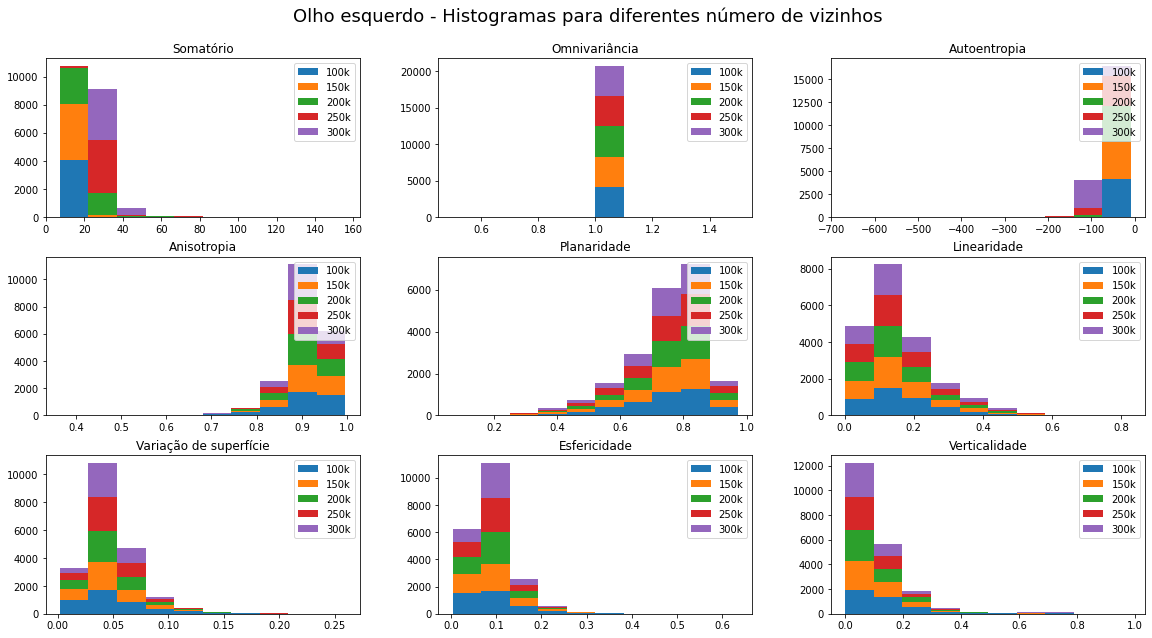

In [13]:
plot_histograms_together(df_le, title='Olho esquerdo - Histogramas para diferentes número de vizinhos')

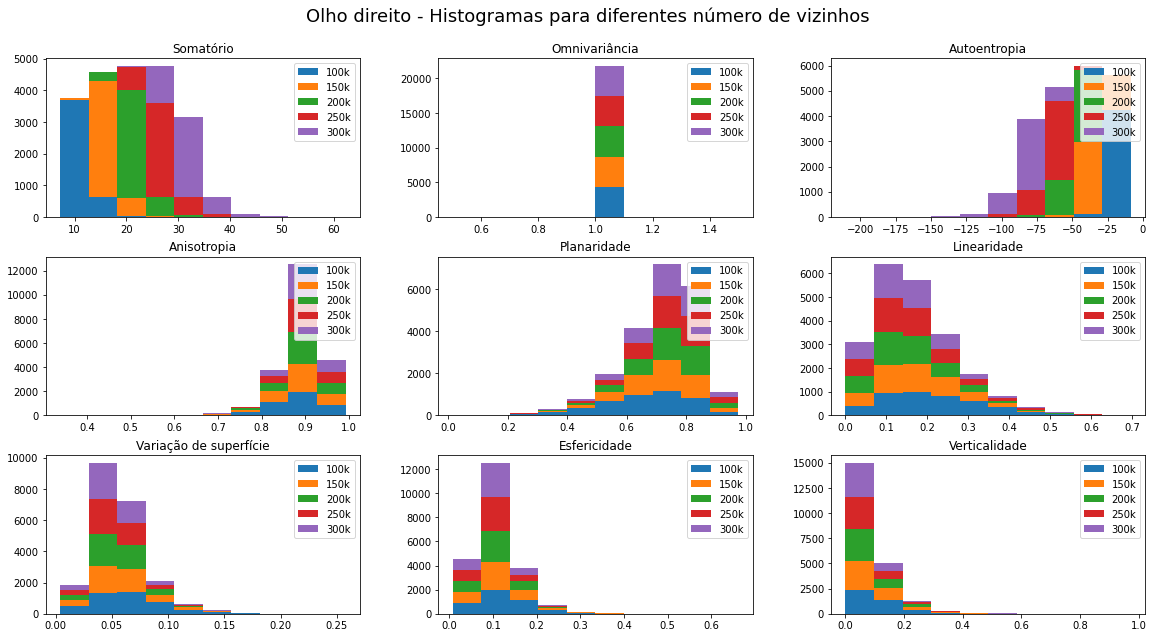

In [14]:
plot_histograms_together(df_re, title='Olho direito - Histogramas para diferentes número de vizinhos')

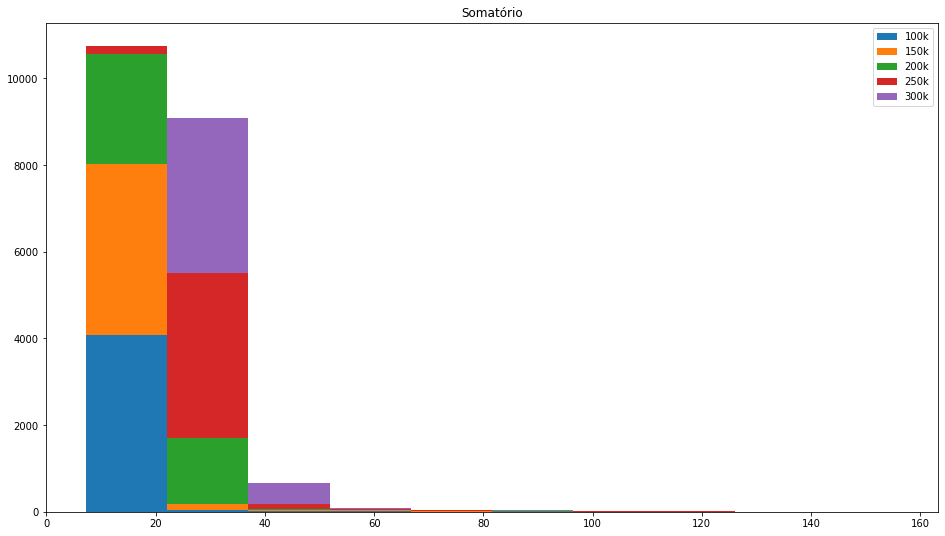

In [15]:
plot_histogram_together(df_le, gfIndex=0)

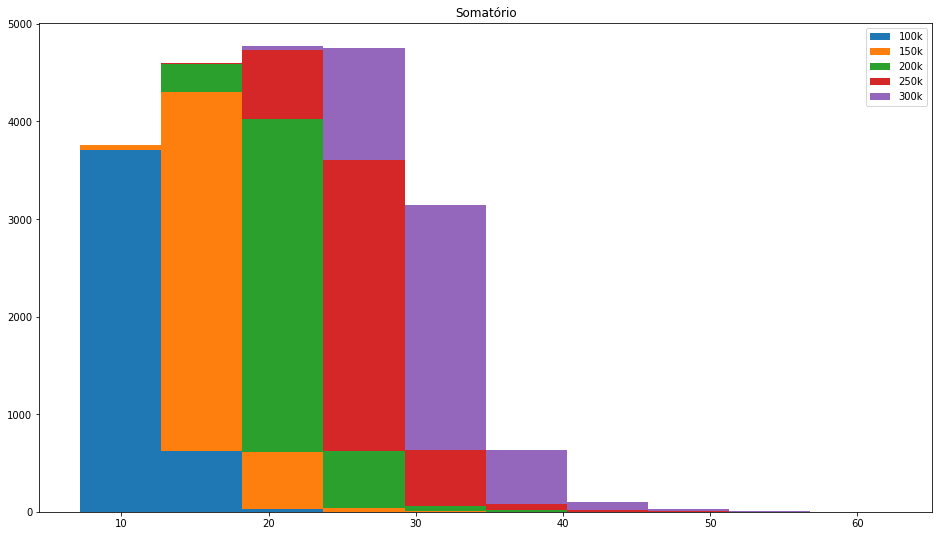

In [16]:
plot_histogram_together(df_re, gfIndex=0)

In [17]:
# helper datasets

# left eye
dfk100_le = df_le.iloc[:,1:10]
dfk100_le.columns = features
dfk150_le = df_le.iloc[:,10:19]
dfk150_le.columns = features
dfk200_le = df_le.iloc[:,19:28]
dfk200_le.columns = features
dfk250_le = df_le.iloc[:,28:37]
dfk250_le.columns = features
dfk300_le = df_le.iloc[:,37:46]
dfk300_le.columns = features

# right eye
dfk100_re = df_le.iloc[:,1:10]
dfk100_re.columns = features
dfk150_re = df_le.iloc[:,10:19]
dfk150_re.columns = features
dfk200_re = df_le.iloc[:,19:28]
dfk200_re.columns = features
dfk250_re = df_le.iloc[:,28:37]
dfk250_re.columns = features
dfk300_re = df_le.iloc[:,37:46]
dfk300_re.columns = features

In [18]:
def plot_scatterplot(df, column, expression=None, title=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(df.columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.95, wspace=0.40, hspace=0.25)
    plt.show()

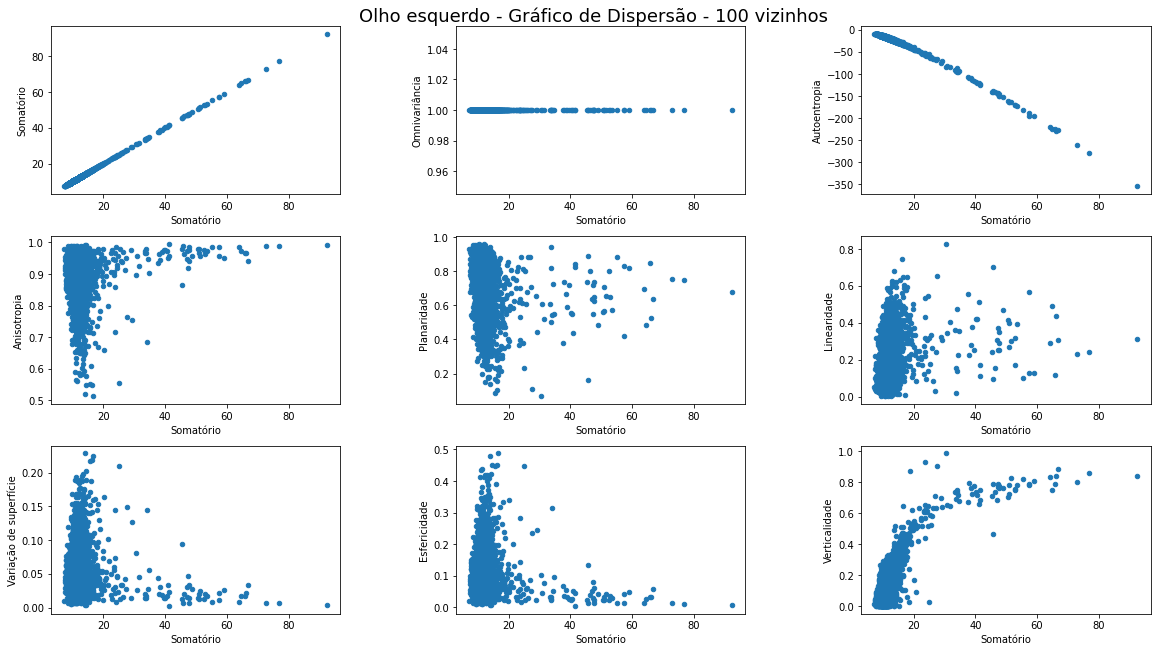

In [19]:
plot_scatterplot(dfk100_le, 'Somatório', title='Olho esquerdo - Gráfico de Dispersão - 100 vizinhos')

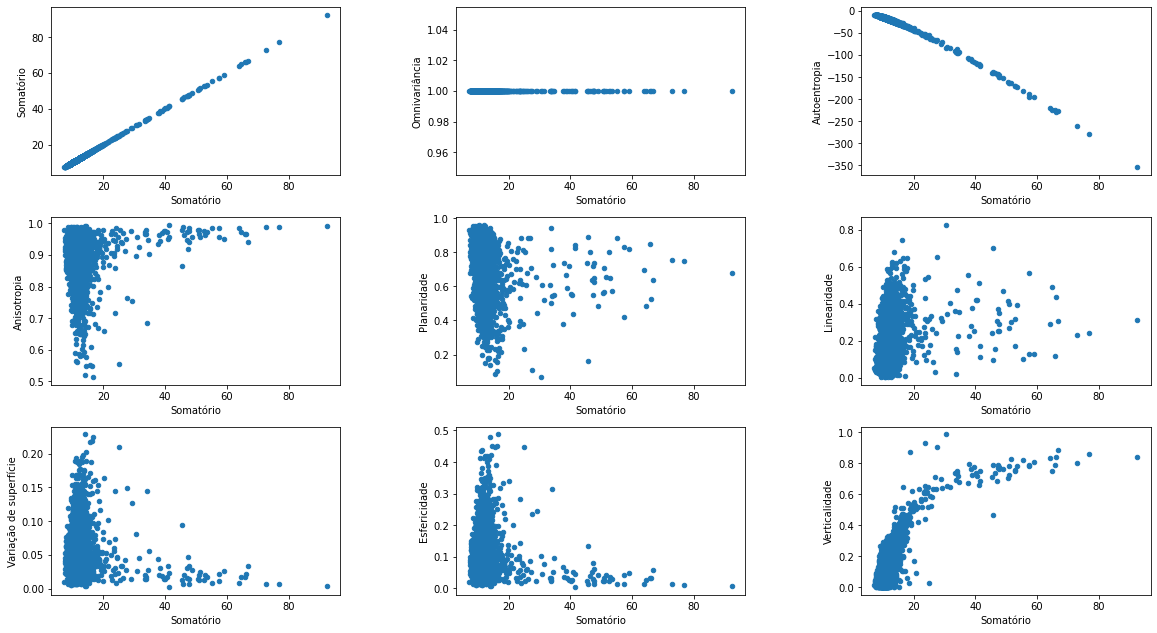

In [20]:
plot_scatterplot(dfk100_re, 'Somatório')

In [21]:
# https://stackoverflow.com/questions/45079601/how-can-i-get-gini-coefficient-in-sklearn

from itertools import combinations

def gini(data):
    x = np.array(data, dtype=np.float32)
    n = len(data)
    diffs = sum(abs(i - j) for i, j in combinations(x, r=2))

    return diffs / (2 * n**2 * data.mean())

def calculate_gini_from_histogram(df, column):
    hist, _ = np.histogram(df[column].dropna().values, bins=10)

    return gini(hist)

def calculate_ginis(df):
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        

    for i, column in enumerate(colsNames):
        print('Feature - ', features[i])
        ginis = [] # helper list to calculate mean and variance
        for j, col in enumerate(column):
            gini = calculate_gini_from_histogram(df, col)
            print(f'{labels[j]}: {gini}')
            ginis.append(gini)
        
        print()
        print('Variância:', np.var(ginis))
        print('Média:', np.mean(ginis))
        print('-----------------------------------------')
        print()

In [22]:
print('Olho esquerdo\n')

calculate_ginis(df_le)

Olho esquerdo

Feature -  Somatório
100k: 0.4413169319826339
150k: 0.43909792571152917
200k: 0.43338157260009647
250k: 0.4270381090207429
300k: 0.4229618909792571

Variância: 4.8503942797956526e-05
Média: 0.4327592860588519
-----------------------------------------

Feature -  Omnivariância
100k: 0.45
150k: 0.45
200k: 0.45
250k: 0.45
300k: 0.45

Variância: 0.0
Média: 0.45
-----------------------------------------

Feature -  Autoentropia
100k: 0.44491075735648816
150k: 0.44409068982151473
200k: 0.4420646406174626
250k: 0.4404968644476604
300k: 0.43895320791123976

Variância: 4.867348997481898e-06
Média: 0.4421032320308731
-----------------------------------------

Feature -  Anisotropia
100k: 0.3216594307766522
150k: 0.35330438977327544
200k: 0.3608297153883261
250k: 0.38207911239749154
300k: 0.3901833092136999

Variância: 0.0005802117082494725
Média: 0.3616111915098891
-----------------------------------------

Feature -  Planaridade
100k: 0.27585624698504585
150k: 0.3031837916063676


In [23]:
print('Olho direito\n')

calculate_ginis(df_re)

Olho direito

Feature -  Somatório
100k: 0.38972477064220185
150k: 0.37763761467889906
200k: 0.366651376146789
250k: 0.36541284403669727
300k: 0.35811926605504585

Variância: 0.00012188376399292997
Média: 0.37150917431192665
-----------------------------------------

Feature -  Omnivariância
100k: 0.45
150k: 0.45
200k: 0.45
250k: 0.45
300k: 0.45

Variância: 0.0
Média: 0.45
-----------------------------------------

Feature -  Autoentropia
100k: 0.39775229357798164
150k: 0.39275229357798164
200k: 0.3883715596330275
250k: 0.3799770642201835
300k: 0.3694724770642202

Variância: 9.964165474286644e-05
Média: 0.38566513761467885
-----------------------------------------

Feature -  Anisotropia
100k: 0.3520412844036697
150k: 0.3454816513761468
200k: 0.3365137614678899
250k: 0.3537155963302752
300k: 0.37405963302752293

Variância: 0.00015424564430603478
Média: 0.3523623853211009
-----------------------------------------

Feature -  Planaridade
100k: 0.24073394495412845
150k: 0.3038532110091743